In [8]:
import pandas as pd

from sklearn import preprocessing

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt

In [9]:
train_data = pd.read_csv('3w1.csv')
train_data

,age,work class,education,education num,marital status,occupation,relationship,race,sex,hours per week,native country,label
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [10]:
def preprocess_dataframe(data):
    
    # read data file and remove any row of data with missing value
    dataframe = data
    for col in dataframe:
        dataframe.drop(dataframe[dataframe[col] == " ?"].index, inplace = True)

    
    # use label encoder to code the whole data file's categorical variables. 
    le = preprocessing.LabelEncoder()

    for col in dataframe.columns:
        le.fit(dataframe[col])
        dataframe[col]=le.transform(dataframe[col])
    
    
    # now seperate training data's labels and features
    
    label = dataframe["label"]
    dataframe = dataframe.drop(["label"], axis = 1)
    
    
    return dataframe, label

In [11]:
# Process with training data
df, label = preprocess_dataframe(train_data)

In [13]:
train_data

,age,work class,education,education num,marital status,occupation,relationship,race,sex,hours per week,native country,label
0,33,4,2,12,2,3,0,4,1,12,38,0
1,21,2,4,8,0,5,1,4,1,39,38,0
2,36,2,10,6,2,5,0,2,1,39,38,0
3,11,2,2,12,2,9,5,2,0,39,4,0
4,20,2,5,13,2,3,5,4,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,2,0,11,2,12,5,4,0,37,38,0
32556,23,2,4,8,2,6,0,4,1,39,38,1
32557,41,2,4,8,6,0,4,4,0,39,38,0
32558,5,2,4,8,4,0,3,4,1,19,38,0


In [180]:
# check if all feature matches Tensorflow's data requirement
df.dtypes

age               int64
work class        int64
education         int64
education num     int64
marital status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours per week    int64
native country    int64
dtype: object

In [176]:
# split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2)

In [177]:
# Use sequential as model, add three layers of Neural Network
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [178]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [179]:

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4964 - accuracy: 0.7643
Epoch 2/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4448 - accuracy: 0.7855
Epoch 3/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4361 - accuracy: 0.7899
Epoch 4/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4308 - accuracy: 0.7923
Epoch 5/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4260 - accuracy: 0.7942
Epoch 6/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.7963
Epoch 7/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.7979
Epoch 8/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4128 - accuracy: 0.7986
Epoch 9/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4065 - accuracy: 0.8015
Epoch 10/100
754/754 [==============================] - 1s 1ms/step - loss: 0.4017 - accura

754/754 [==============================] - 1s 1ms/step - loss: 0.3645 - accuracy: 0.8236
Epoch 82/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3647 - accuracy: 0.8253
Epoch 83/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3643 - accuracy: 0.8234
Epoch 84/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3653 - accuracy: 0.8229
Epoch 85/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3643 - accuracy: 0.8243
Epoch 86/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3643 - accuracy: 0.8238
Epoch 87/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8236
Epoch 88/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3648 - accuracy: 0.8250
Epoch 89/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3640 - accuracy: 0.8239
Epoch 90/100
754/754 [==============================] - 1s 1ms/step - loss: 0.3647 - accuracy: 

In [181]:
# produce test results
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]
accuracy_score(y_test, y_hat)

0.8281120503895243

### Try on testing data

In [167]:
data_test = pd.read_csv('adult.csv')

In [168]:
df_test, df_label = preprocess_dataframe(data_test)

In [174]:
results = model.predict(df_test)
results = [0 if val < 0.5 else 1 for val in results]


In [175]:
accuracy_score(df_label, results)

0.8143322475570033

In [123]:
results = model.predict(df_test)
results = [0 if val < 0.5 else 1 for val in results]
accuracy_score(df_label, results)

0.8197611292073833

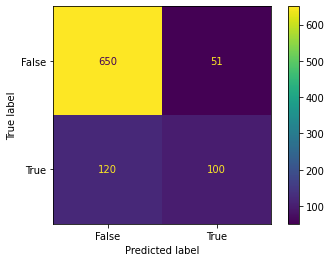

In [187]:
confusion_matrix = metrics.confusion_matrix(df_label, results)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [14]:
label.value_counts()

0    22653
1     7508
Name: label, dtype: int64

Training and testing results all achieved 80%+, parameters in Sequential() still needs some studies to find the possible best values to build certain model. Number of layers of Neural Network model also need more consideration. Epochs and batch sizes are choosen randomly, which also need to be find out on how these value of parameters should be determined. 

We could see that most of the <=50k are predicted correctly, but >50k is not. This is likely to be caused by this imbalanced dataset, where the model has obtained too much information about <=50k. 

Below this will repeat the whole process but now using a balanced dataset by filtering training data. 